In [141]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd 

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tflearn.data_utils as du
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [143]:
print(tf.__version__)



1.10.1


In [144]:
x_train = pd.read_csv('./data/csvTrainImages 13440x1024.csv', header = None)
y_train = pd.read_csv('./data/csvTrainLabel 13440x1.csv', header = None)
x_test = pd.read_csv('./data/csvTestImages 3360x1024.csv', header = None)
y_test = pd.read_csv('./data/csvTestLabel 3360x1.csv', header = None)

x_train = x_train.iloc[:,:].values.astype('float32')
y_train = y_train.iloc[:,:].values.astype('int32')-1
x_test = x_test.iloc[:,:].values.astype('float32')
y_test = y_test.iloc[:,:].values.astype('int32')-1

# Reshape the data

In [267]:

x_train = x_train.reshape(x_train.shape[0], 32, 32)
x_train = x_train.swapaxes(1, 2)
x_test = x_test.reshape(x_test.shape[0], 32, 32)
x_test = x_test.swapaxes(1, 2)



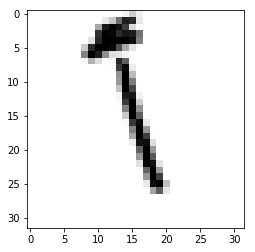

[0]


In [146]:
import matplotlib.pyplot as plt

plt.imshow(x_train[2].squeeze(),cmap=plt.cm.binary)
plt.show()
print(y_train[7])

## Reshping data for model 1

In [147]:
# run this before fitting model 1


# x_train = x_train.reshape([-1, 32, 32, 1])
# x_test = x_test.reshape([-1, 32, 32, 1])

# x_train, mean1 = du.featurewise_zero_center(x_train)
# x_test, mean2 = du.featurewise_zero_center(x_test)

# y_train = du.to_categorical(y_train,28)
# y_test = du.to_categorical(y_test,28)

# Normalize

In [268]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


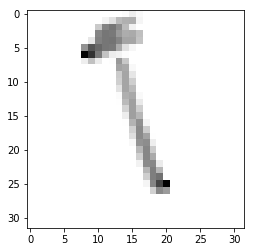

In [149]:
print(x_train[0])

plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

# Building  model 1

In [150]:
# recognizer = Sequential()

# recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (32,32,1)))
# recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# recognizer.add(MaxPool2D(pool_size=(2,2)))
# recognizer.add(Dropout(0.25))


# recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# recognizer.add(Dropout(0.25))


# recognizer.add(Flatten())
# recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
# recognizer.add(Dense(units = 256, activation = "relu"))
# recognizer.add(Dropout(0.5))
# recognizer.add(Dense(28, activation = "softmax"))

In [151]:
# recognizer.summary()

In [152]:
# optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
# recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# datagen = ImageDataGenerator(
#         featurewise_center=False, 
#         samplewise_center=False,  
#         featurewise_std_normalization=False,
#         samplewise_std_normalization=False,
#         zca_whitening=False,
#         rotation_range=10,
#         zoom_range = 0.1,  
#         width_shift_range=0.1, 
#         height_shift_range=0.1,
#         horizontal_flip=False,
#         vertical_flip=False)

## fitting model 1

In [153]:
# datagen.fit(x_train)
# recognizer.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
#                              epochs = 30, verbose = 2, steps_per_epoch=x_train.shape[0] // 100)

# fitting extra model 

In [26]:
import numpy as np
import pandas as pd
trainx = pd.read_csv("./data/csvTrainImages 13440x1024.csv",header=None)
trainy = pd.read_csv("./data/csvTrainLabel 13440x1.csv",header=None)

testx = pd.read_csv("./data/csvTestImages 3360x1024.csv",header=None)
testy = pd.read_csv("./data/csvTestLabel 3360x1.csv",header=None)

In [27]:
# Split data into training set and validation set
#training images
trainx = trainx.values.astype('float32')
#training labels
trainy = trainy.values.astype('int32')-1

#testing images
testx = testx.values.astype('float32')
#testing labels
testy = testy.values.astype('int32')-1

In [28]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

original_trainy = trainy
#One Hot encoding of train labels.
trainy = to_categorical(trainy)

original_testy = testy
#One Hot encoding of test labels.
testy = to_categorical(testy)

In [29]:
print(trainx.shape, trainy.shape, testx.shape, testy.shape)

(13440, 1024) (13440, 28) (3360, 1024) (3360, 28)


In [30]:
# reshape input images to 28x28x1
trainx = trainx.reshape([-1, 32, 32, 1])
testx = testx.reshape([-1, 32, 32, 1])
print(trainx.shape, trainy.shape, testx.shape, testy.shape)

(13440, 32, 32, 1) (13440, 28) (3360, 32, 32, 1) (3360, 28)


In [31]:
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=4, activation= 'relu', input_shape=(32,32,1)))
model.add(Conv2D(32, kernel_size=4, activation= 'relu'))
model.add(Flatten())
model.add(Dense(28, activation= 'softmax'))

In [32]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
#train the model
model.fit(trainx, testx, validation_split=0.2, epochs=3)

ValueError: Error when checking target: expected dense_5 to have 2 dimensions, but got array with shape (3360, 32, 32, 1)

In [34]:
score = model.evaluate(testx, testy)
print('Test accuarcy: %0.2f%%' % (score[0] * 100))

3360/3360 [==============================] - 6s 2ms/step
Test accuarcy: 1215.21%



----


# Building Model 2

In [251]:
from keras import regularizers

                
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Conv2D(128, kernel_size=3,input_shape = (32,32,1) ,activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(0.001)))
model.add(tf.keras.layers.Dropout(0.30))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.L1L2(0.001)))
model.add(tf.keras.layers.Dense(28, activation=tf.nn.softmax))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [252]:
# model.build?
# model.summary()

In [253]:
%%time
from livelossplot import PlotLossesKeras
model.fit(x_train, y_train, epochs=30, 
          callbacks=[PlotLossesKeras()],
          verbose=1,
         validation_data=(x_test, y_test))

ValueError: Error when checking target: expected dense_129 to have 4 dimensions, but got array with shape (13440, 1)

In [239]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

3360/3360 [==============================] - 0s 46us/step
0.9798765557152884
0.7610119047619047


In [197]:
# Programmer : Dev Bishnoi

# This module is constructing a deep neural network with convolutional and fully connected layers.

import tensorflow as tf

width = 28
height = 28
N = 36 # No of classes
flatten_size = width * height
rate = 4e-4

def model(intput_x, input_y):

	with tf.name_scope("reshapeTo4d"):
		reshaped = tf.reshape(intput_x, [-1, width, height, 1], name = 'reshaped')

	with tf.name_scope("paramsAtL1"):
		lyr1_w = tf.Variable(tf.truncated_normal(shape = [5, 5, 1, 64], dtype = tf.float32), name = "lyr1_w")
		lyr1_b = tf.Variable(tf.constant(0.1, shape=[64], dtype = tf.float32), name = "lyr1_b")

	with tf.name_scope("Layer1"):
		lyr1_opt = tf.nn.relu(tf.nn.conv2d(reshaped, lyr1_w, strides = [1, 1, 1, 1], padding = 'SAME') + lyr1_b, name = "reluLyr1")

	with tf.name_scope("maxpoolingAtLayer1"):
		lyr1_mxopt = tf.nn.max_pool(lyr1_opt, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME', name = 'mxpoolLyr1')

	with tf.name_scope("paramsAtL2"):
		lyr2_w = tf.Variable(tf.truncated_normal(shape = [5, 5, 64, 128], dtype = tf.float32), name = "lyr2_w")
		lyr2_b = tf.Variable(tf.constant(0.1, shape=[128], dtype = tf.float32), name = "lyr2_b")

	with tf.name_scope("Layer2"):
		lyr2_opt = tf.nn.relu(tf.nn.conv2d(lyr1_mxopt, lyr2_w, strides = [1, 1, 1, 1], padding = 'SAME') + lyr2_b, name = "reluLyr2")

	with tf.name_scope("maxpoolingAtLayer2"):
		lyr2_mxopt = tf.nn.max_pool(lyr2_opt, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME', name = "mxpoolLyr2")

	with tf.name_scope("FlattenForFCL"):
		flatten_opt = tf.reshape(lyr2_mxopt, [-1, 7 * 7 * 128], name = "Flatten")

	with tf.name_scope("paramsAtL3"):
		lyr3_w = tf.Variable(tf.truncated_normal(shape = [7 * 7 * 128, 864], dtype = tf.float32), name = "lyr3_w")
		lyr3_b = tf.Variable(tf.constant(0.1, shape = [864], dtype = tf.float32), name = "lyr3_b")

	with tf.name_scope("Layer3"):
		lyr3_opt = tf.nn.relu(tf.add(tf.matmul(flatten_opt, lyr3_w), lyr3_b), name = "reluLyr3")

	with tf.name_scope("paramsAtL4"):
		lyr4_w = tf.Variable(tf.truncated_normal(shape = [864, 432], dtype = tf.float32), name = "lyr4_w")
		lyr4_b = tf.Variable(tf.constant(0.1, shape = [432], dtype = tf.float32), name = "lyr4_b")

	with tf.name_scope("Layer4"):
		lyr4_opt = tf.nn.relu(tf.add(tf.matmul(lyr3_opt, lyr4_w), lyr4_b), name = "reluLyr4")

	with tf.name_scope("paramsAtOptLayer"):
		opt_w = tf.Variable(tf.truncated_normal(shape = [432, N], dtype = tf.float32), name = "opt_w")
		opt_b = tf.Variable(tf.constant(0.1, shape = [N], dtype = tf.float32), name = "opt_b")

	with tf.name_scope("optLayer"):
		resultOp = tf.add(tf.matmul(lyr4_opt, opt_w), opt_b, name = "resultOp")

	with tf.name_scope("crossEntropy"):
		crossEntropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = resultOp, labels = input_y), name = "crossEntropy")

	with tf.name_scope("optimizer"):
		optimizer = tf.train.AdamOptimizer(rate).minimize(crossEntropy)

	with tf.name_scope("truthTableBool"):
		truthTableBool = tf.equal(tf.argmax(resultOp, 1), tf.argmax(input_y, 1), name = "truthTableBool")

	with tf.name_scope("truthTableInt"):
		truthTableInt = tf.cast(truthTableBool, tf.int32, name = "truthTableInt")

	with tf.name_scope("prediction"):
		prediction = tf.reduce_sum(truthTableInt, name = "prediction")

	return crossEntropy, optimizer, prediction




In [198]:
model(x_train, y_train)

ValueError: Dimension size must be evenly divisible by 784 but is 13762560 for 'reshapeTo4d_1/reshaped' (op: 'Reshape') with input shapes: [13440,32,32], [4] and with input tensors computed as partial shapes: input[1] = [?,28,28,1].